# USA Gymnast with best chances to medal in Uneven Bars are:

- simone biles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('../Combine_Data/vt_encoded.csv')
olymp = pd.read_csv('../Data/cleandata22-23/encoded_w_olympics_vt.csv')
vtnames = pd.read_csv('../Data/cleandata22-23/encoded_w_olympics_vtnames.csv')

In [3]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)


In [4]:
df.head(1)

,Rank,D,E,ND,Total,D2,E2,ND2,Total2,Average,year,medal,Name,Nation,round_2015,round_final
0,1.0,5.6,8.733,0.0,14.333,5.8,8.433,0.0,14.233,14.283,2018.0,0,45,6,False,True


In [5]:
olymp.head(1)

,Rank,D_Score,E_Score,Penalty,Score,year,Name,nation,Round_AAfinal,Round_TeamFinal,Round_final,Round_qual
0,110.0,4.2,8.433,0.3,12.333,2022,215,22,False,False,False,True


In [6]:
df = df.drop(columns=['D2', 'E2', 'ND2', 'Total2', 'round_2015'])


In [7]:
df = df.rename(columns={'D': 'D_Score', 'E': 'E_Score', 'ND': 'Penalty', 
                        'round_final': 'Round_final', 'Nation': 'nation'})



In [8]:
df = df.drop(columns=['Total'])


In [9]:
df = df.rename(columns={'Average': 'Score'})


In [10]:
olymp = olymp.drop(columns=['Round_AAfinal', 'Round_TeamFinal', 'Round_qual'])

In [11]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)


In [12]:

# Assuming you already have your DataFrame 'df' and the target variable is 'medal'
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

# Print the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         2

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Confusion Matrix:
[[27  0]
 [ 0  2]]

Classifier: AdaBoost
Accuracy: 0.9655
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.67      1.00      0.80         2

    accuracy                           0.97        29
   macro avg       0.83      0.98      0.89        29
weighted avg       0.98      0.97      0.97        29

Confusion Matrix:
[[26  1]
 [ 0  2]]

Classifier: SVM
Accuracy: 0.9310
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.0

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classifier: Random Forest
Accuracy: 1.0000

Accuracy: 0.9655172413793104
Confusion Matrix:
 [[27  0]
 [ 1  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.50      0.67         2

    accuracy                           0.97        29
   macro avg       0.98      0.75      0.82        29
weighted avg       0.97      0.97      0.96        29



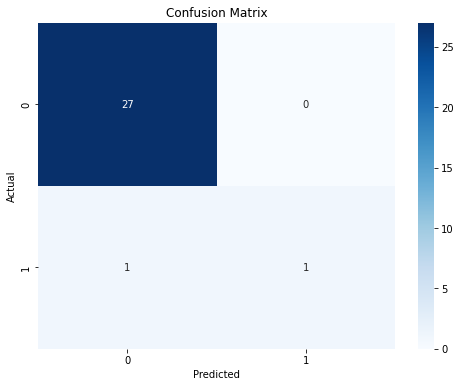

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# # Fit the classifier on the training data
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [15]:
olymp_pred = clf.predict(olymp)


In [16]:
ypreds  = pd.Series(olymp_pred)

In [17]:
olymp['ypred']=ypreds

In [18]:
olymp['ypred'].value_counts()

ypred
0    1523
1       1
Name: count, dtype: int64

In [19]:
filtered_df = olymp[olymp['ypred'] == 1]

In [20]:
filtered_df

,Rank,D_Score,E_Score,Penalty,Score,year,Name,nation,Round_final,ypred
130,0.0,6.4,9.8,0.5,15.7,2023,454,78,False,1


In [21]:
# List of Name_encoded values you want to filter by
name_encoded_values = [454]

# Create an empty set to store unique names
unique_names = set()

# Iterate through the DataFrame and add unique names to the set
for index, row in vtnames.iterrows():
    if row['Name_encoded'] in name_encoded_values:
        unique_names.add(row['Name'])

# Convert the set of unique names back to a list
unique_names_list = list(unique_names)


In [22]:
unique_names_list

['simone biles']